<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-mls-project/master/img/GMITLOGO.jpg" width="750"/></p>

# GMIT, H.Dip in Data Analytics, Machine Learning and Statistics Project 2019

## 1. Introduction

This repository contains all of the files pertaining to my 2019 project submission for the Machine Learning and Statistics module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of an 8 week period in October and November 2019. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objective 

The objective of the project concerns the well known *Boston House Prices Dataset*. This is a dataset that contains data that was collected by the U.S. census service in the 1970s[2]. The goal of this project is to analyse this dataset in order to demonstrate proficiency and understanding of many statistical and machine learning concepts. The aim is to use some Python[3] packages such as scipy[4], Jupyter, and keras[5] to gain some insight from the data. For the purpose of assessment the project is broken down into 3 sections as follows:

* **Describe:** In this part of the project, the dataset will be imported into this Jupyter notebook and analysed using descriptive statistics and plots.  
* **Infer:** In this part inferential statistics will be used to investigate the effect that proximity to the Charles river has on median house prices.  
* **Predict:** In this part of the project the dataset will be used to train a neural network that can be used for predicting house prices based on the other data in the dataset.   

<p align="center">
  <img src="img/boston-houses.png" width="750"/>
<div align='center' style='font-size:12px'> <b><i>Boston Houses</i></b></div>  
</p>
  

### 1.2 Project Plan

The plan for this project is as follows:

* In Section 2 the dataset will be loaded and analysed using descriptive statistics. The plan will be to look at the relationships between the different data features rather than each data feature on its own. Where there is a strong relationship between features this will be discussed and analysed further.
* In Section 3 the dataset is to be analysed again to see is there is a statistically significant difference between the median house price in areas along the Charles river, versus those which are not. The focus here will be on selecting an appropriate test for significance. 
* In Section 4 a neural network will be trained using the data in the dataset to try and predict a house price based on other inputs. The neural network will then be evaluated for accuracy and then refined to try and improve it. 
* In the Section 5 the project will be concluded and the relative success of the project will be discussed.

## 2. Describe the Boston Housing Dataset

### 2.1 Introduction to the Boston Housing Price Dataset

The Boston Housing dataset was collected by the US census service in the 1970s. It was first published in 1978 by David Harrison and Daniel Rubinfield in their paper *Hedonic Housing Prices and Demand for Clean Air*[6]. In their study they investigated the possibility of using housing data to see if there was a market demand to pay for clean air. By analysing data about the desirability of individual suburbs in the Boston area, they estimated how willing people were to pay for air quality improvements. They found that minor air pollution damages were found to increase with the level of air pollution and levels of household income.

Since its initial publication it has become a useful dataset in the teaching of statistical modeling and machine learning. There are many reasons for this including:
* It is a a manageable size - there are 506 data points in it - each with 14 features (columns of data measurements).
* There are some interesting relationships between the different features which are worthy of analysis and discussion
* It is a good dataset for demonstrating regression and multivariate statistics.
* It is a real dataset representing a real phenomenon and therefore it is quite interesting fro students to analyse.

### 2.2 Loading the Dataset

In this section, the required Python libraries for the project will be imported. These include:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `seaborn`
* 
*  
*    
Once the libraries are imported, we will the load the dataset using the `sklearn` package. 

#### 2.2.1 Importing the libraries

In [9]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2.2.2 Loading the dataset from sklearn

In the next block of code we will load the dataset. Note that `sklearn`[7] is a machine learning package for Python. 
In supervised machine learning it is common to divide the data set into model inputs (data) and model outputs (targets)[8]. As the Boston housing dataset is commonly used for regression problems required to predict housing prices, `sklearn` predefines the house prices feature as a target. We have to add this back into data set.

In [10]:
# load the dataset using the sklearn package - https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston
boston_house_prices = load_boston()

# create a dataframe with the data from the dataset
df = pd.DataFrame(boston_house_prices.data, columns=boston_house_prices.feature_names)

# add the median value to the dataframe
df["MEDV"] = boston_house_prices.target

# show the head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset has 14 different columns of data as can be seen above. We can determine the number of rows using the `shape` function

In [8]:
# check the shape of the dataset
df.shape

(506, 14)

This confirms that the dataset has 506 different data points each with 14 columns of data points. The next step is to try and understand what the different columns such as **CRIM**, **ZN**, **INDUS** etc. mean. Luckily there is a handy function in sklearn for this (DESCR). The output of this function contains much detail on the dataset including the following information on the columns names:

* __CRIM__     per capita crime rate by town
* __ZN__       proportion of residential land zoned for lots over 25,000 sq.ft.
* __INDUS__    proportion of non-retail business acres per town
* __CHAS__     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX__      nitric oxides concentration (parts per 10 million)
* __RM__       average number of rooms per dwelling
* __AGE__      proportion of owner-occupied units built prior to 1940
* __DIS__      weighted distances to five Boston employment centres
* __RAD__      index of accessibility to radial highways
* __TAX__      full-value property-tax rate per \$10,000
* __PTRATIO__  pupil-teacher ratio by town
* __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* __LSTAT__    % lower status of the population
* __MEDV__     Median value of owner-occupied homes in $1000's

So, it can be seen that the dataset contains a good mix of variables covering socioeconomic factors (such as house prices, property tax rates, pupil teacher ratio in the schools, crime rates) as well as locational factors (such as proximity to Charles river, accessibility to highways) ans environmental factors (such as NOX levels). In the next section we will begin to anaylse the data to see what it tells us.

### 2.3 Analysis of the Dataset - what does it tell us!?

In [14]:
# describe the dataset
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


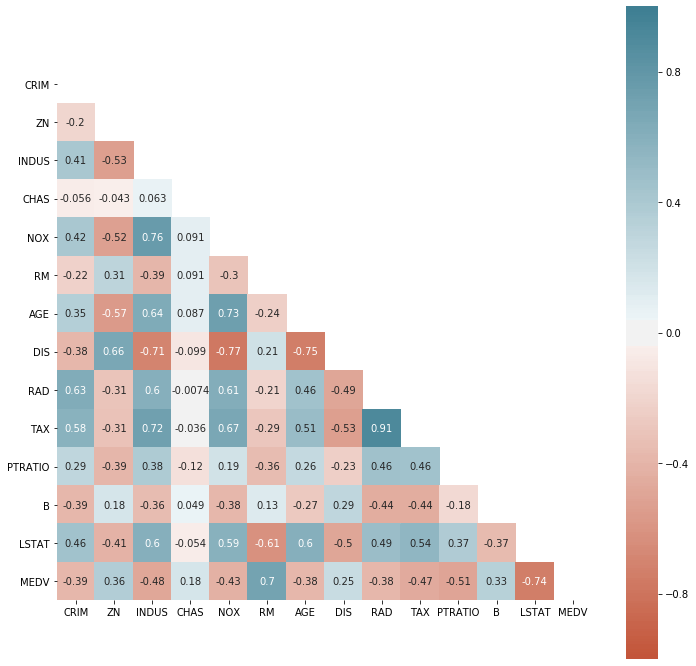

In [16]:

# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 12]
# define the correlations between the data columns in the set
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
corr = df.corr()

# mask the data set to only avoid duplication
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, mask=mask, annot=True)

/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


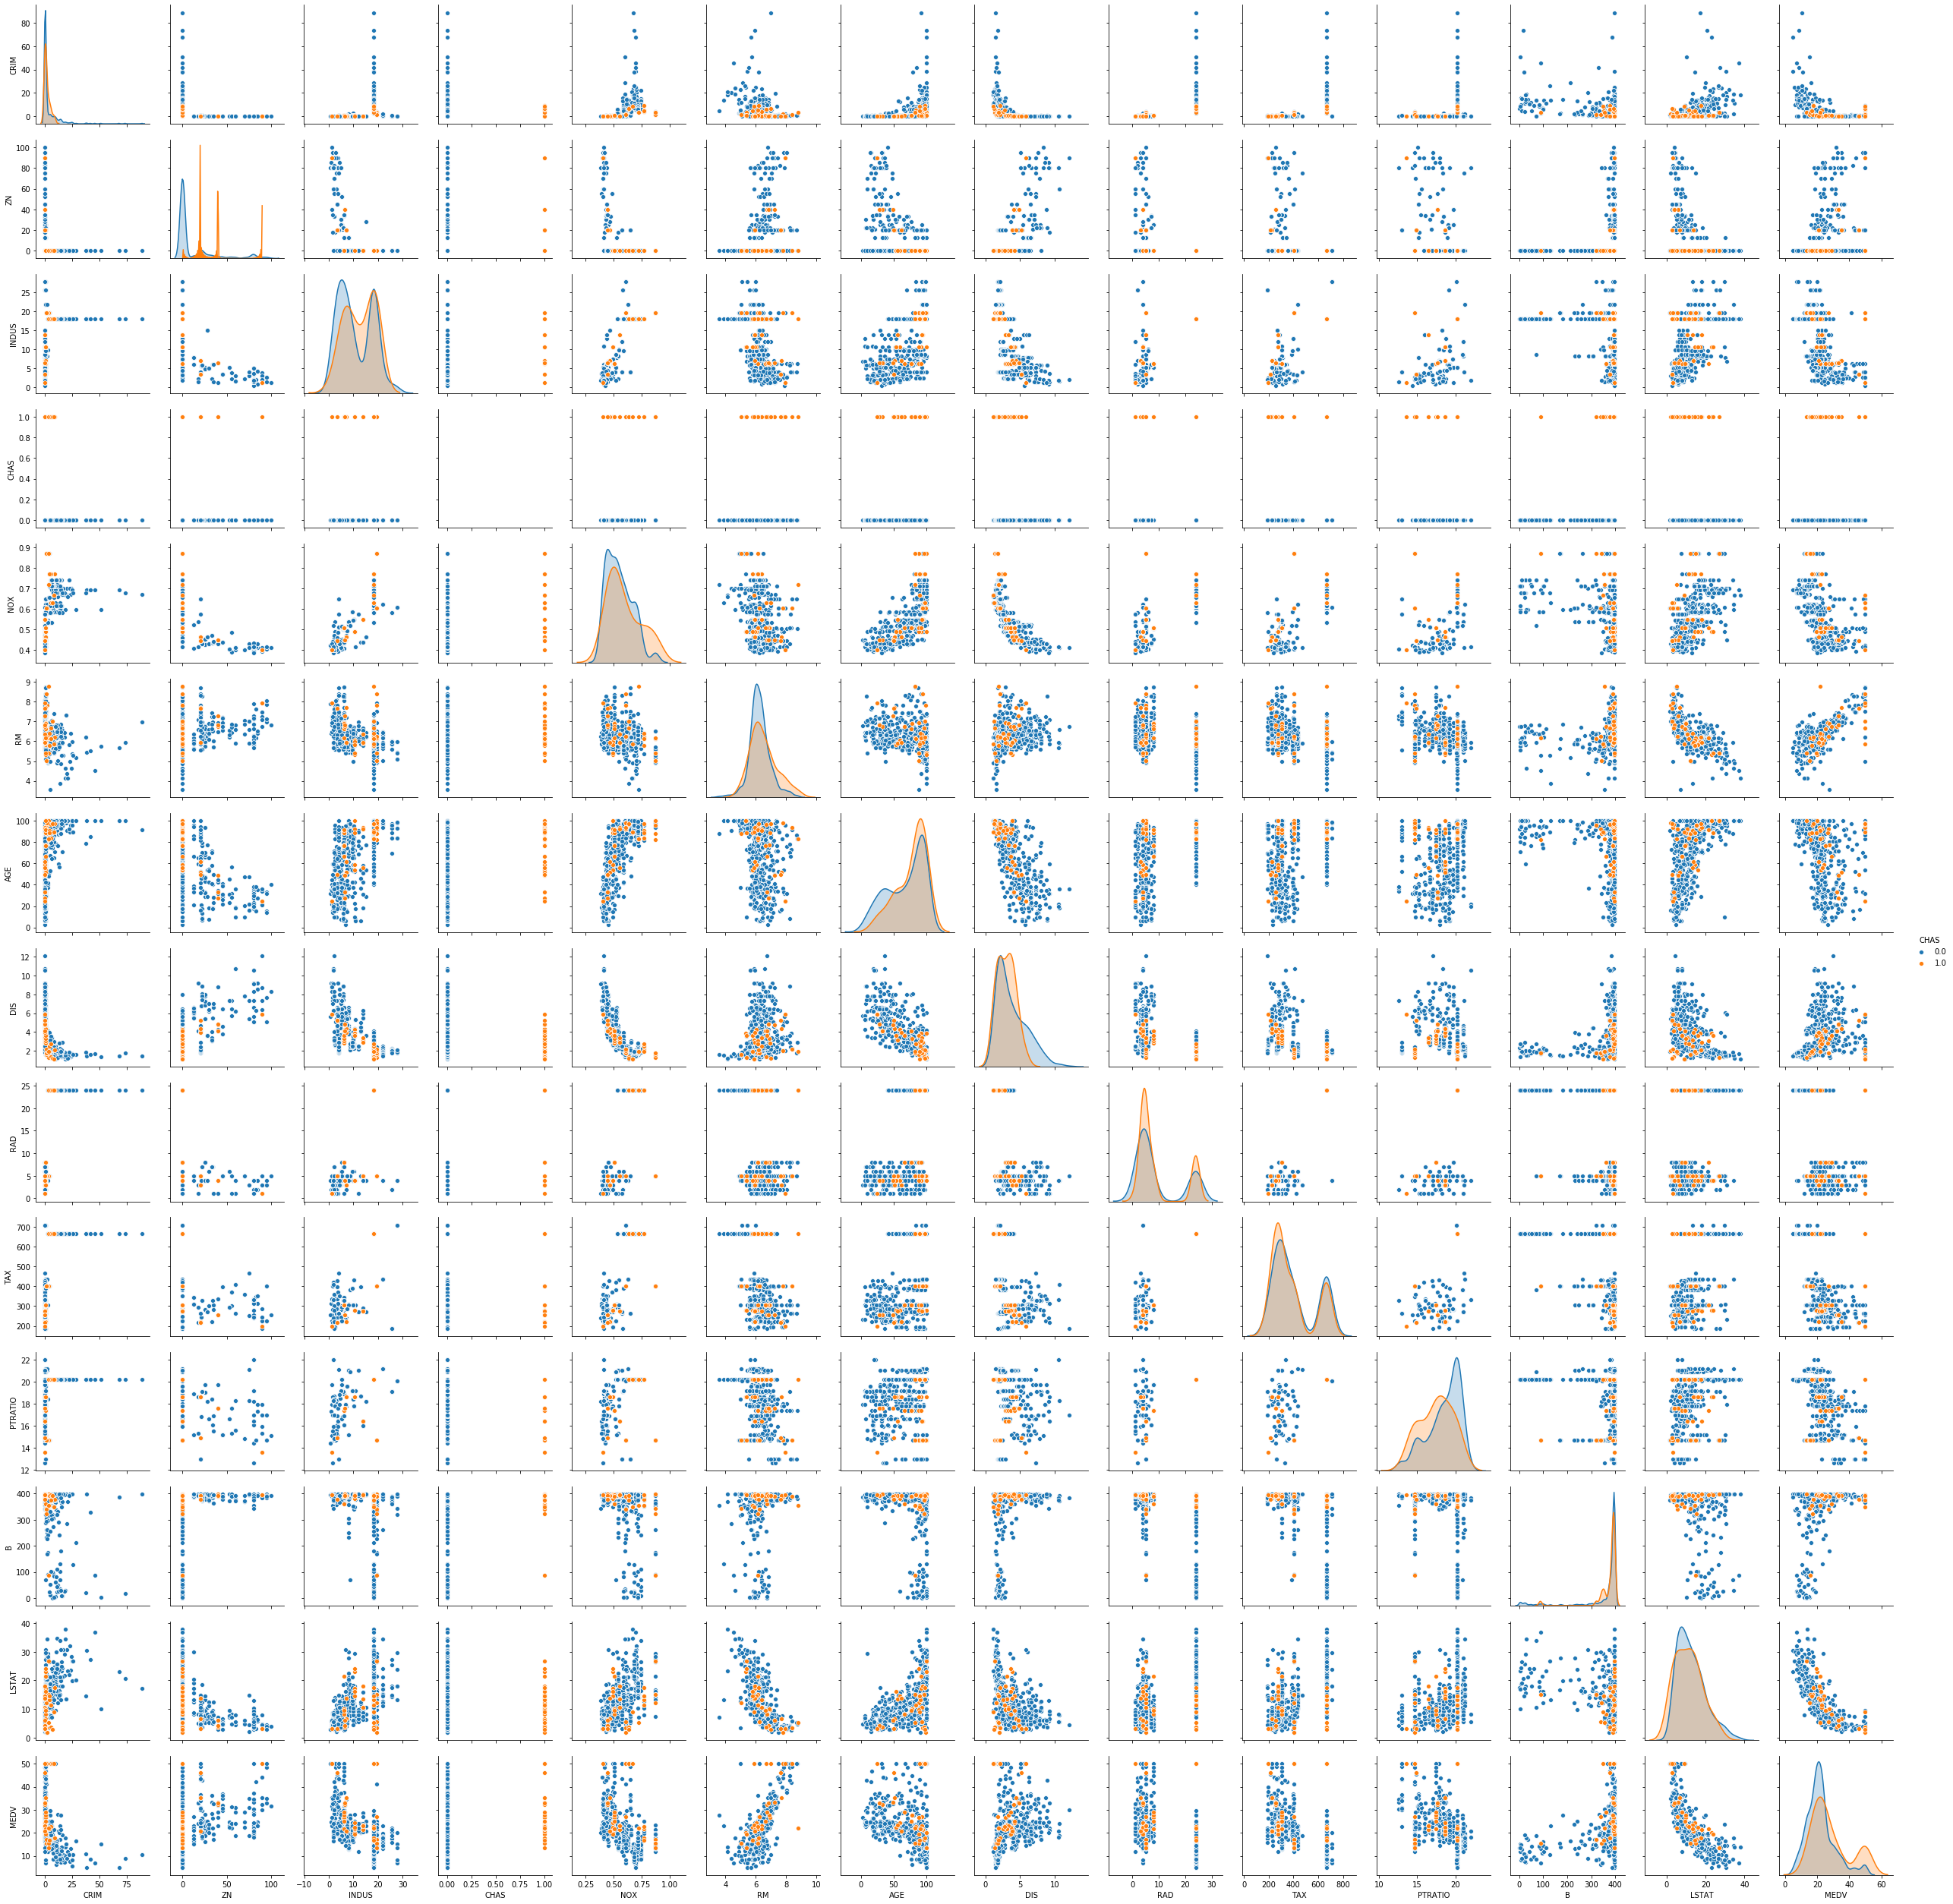

In [8]:
# pair plot to visualise the correlations
sns.pairplot(df, hue='CHAS')

## 3. Comparing House Prices with Inferential Statistics

## 4. Predicting Boston House Prices with Keras

In [59]:
import sklearn.linear_model as lm
import pandas as pd
# create 2 identical arrays
x = [1,2,3,4,5]
y = [1,2,3,4,5]
# put them in a datafram
df = pd.DataFrame(x)
df[1] = y
# name the columns
df.columns = ['x', 'y']

# define the inputs and outputs for the model
inputs = df[['x']]
outputs = df['y']

# fit the model
m = lm.LinearRegression()
m.fit(inputs,outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# get the coeficients
m.coef_

array([1.])

In [61]:
# and the intercept
m.intercept_

0.0

In [62]:
# and the r2 value
m.score(inputs,outputs)

1.0

## 5. Conclusions

## References

1. [1] Project Jupyter. Project Jupyter Home. https://www.jupyter.org/
1. [2] University of Toronto. Boston Dataset. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. [3] Python Software Foundation. Welcome to python.org. https://www.python.org/
1. [4] SciPy developers. The scipy python package. https://www.scipy.org/
1. [5] Keras Team. Keras: The python deep learning library. https://keras.io/
1. [6] Hedonic Housing Prices and the Demand for Clean Air. Harrison and Rubinfield. 1978.
1. [7] sklearn developers. The sklearn python package. https://scikit-learn.org/stable/.
1. [8] sklearn developers. Dataset loading. https://scikit-learn.org/stable/datasets/index.html


## End